In [1]:
"""Librerias"""
"""operaciones con arrays"""
import numpy as np
"""tratar imagenes"""
import cv2
"""crear graficas"""
import matplotlib.pyplot as plt
"""manipular rutas del sistema operativo"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
"""encontrar directorios"""
import pathlib
"""mover archivos"""
import shutil
"""operaciones avanzadas con arrays de imagenes"""
import scipy
"""manipular imagenes"""
import PIL
"""invocar metodos avanzados"""
import tensorflow as tf
"""importar modulos de keras"""
from tensorflow import keras
"""generador de datos"""
from keras.preprocessing.image import ImageDataGenerator
"""conversor y carga de datos"""
from keras.utils.image_utils import  array_to_img, img_to_array, load_img
"""eliminar fondo de imagenes"""
from rembg import remove

# Cargar dataset cacao

In [2]:
"""directorio de imagenes"""
dir_img = "../EnfermedadesCacao"
"""comprobar directorio principal de imagenes"""
dataimg_dir = pathlib.Path(dir_img)
"""obtener clases de las imagenes"""
clases_img = os.listdir(dataimg_dir)
"""mostrar clases"""
print(clases_img)
"""mostrar directorio local"""
dataimg_dir

['Monilia', 'Sana']


WindowsPath('../EnfermedadesCacao')

In [3]:
"""comprobar existencia de imagenes"""
def comprobarImagenes(_clases_img,_dataimg_dir):
    for i in _clases_img:
        """mostrar n imagen"""
        print(list(_dataimg_dir.glob(f'./{i}/*.jpg'))[:5])
        """mostrar cantidad imagen"""
        print(len(list(_dataimg_dir.glob(f'./{i}/*.jpg'))))

    print("Total imagenes:",len(list(_dataimg_dir.glob('*/*.jpg'))))

## Crear directorios para el aumento de datos

In [4]:
"""obtener directorio para aumentar imagenes"""
dir_imgda="../EnfermedadesCacao_BDA/"
"""comprobar directorio principal de imagenes DA"""
img_dir_da = pathlib.Path(dir_imgda)
"""obtener clases de las imagenes"""
clases_img2 = os.listdir(img_dir_da)
print(clases_img2)
"""mostrar directorio local"""
img_dir_da

['Monilia', 'monilia1', 'monilia2', 'monilia3', 'monilia4', 'monilia5', 'Sana']


WindowsPath('../EnfermedadesCacao_BDA')

In [10]:
"""obtener cada archivo de imagen por clase"""
for img_clase in clases_img:
    ruta = dir_img + "/" + img_clase
    """obtener lista de imagenes de cada clase"""
    imagenes_actuales = os.listdir(ruta)
    print(imagenes_actuales)
    """asignar imagenes a nuevo directorio"""
    for img in imagenes_actuales:
        print(f"Copiando [{img}] en EnfermedadesCacao_BDA/{img_clase}")
        """indicar directorio origen de la imagen"""
        origen_img = os.path.join(dir_img + "/" + img_clase, img)
        """indicar directorio destino de la imagen"""
        destino_img = os.path.join(dir_imgda + img_clase, img)
        """mover imagen"""
        shutil.copy(origen_img, destino_img)

['Monilia1.jpg', 'Monilia10.jpg', 'Monilia100.jpg', 'Monilia101.jpg', 'Monilia102.jpg', 'Monilia103.jpg', 'Monilia104.jpg', 'Monilia105.jpg', 'Monilia11.jpg', 'Monilia12.jpg', 'Monilia13.jpg', 'Monilia14.jpg', 'Monilia15.jpg', 'Monilia16.jpg', 'Monilia17.jpg', 'Monilia18.jpg', 'Monilia19.jpg', 'Monilia2.jpg', 'Monilia20.jpg', 'Monilia21.jpg', 'Monilia22.jpg', 'Monilia23.jpg', 'Monilia24.jpg', 'Monilia25.jpg', 'Monilia26.jpg', 'Monilia27.jpg', 'Monilia28.jpg', 'Monilia29.jpg', 'Monilia3.jpg', 'Monilia30.jpg', 'Monilia31.jpg', 'Monilia32.jpg', 'Monilia33.jpg', 'Monilia34.jpg', 'Monilia35.jpg', 'Monilia36.jpg', 'Monilia37.jpg', 'Monilia38.jpg', 'Monilia39.jpg', 'Monilia4.jpg', 'Monilia40.jpg', 'Monilia41.jpg', 'Monilia42.jpg', 'Monilia43.jpg', 'Monilia44.jpg', 'Monilia45.jpg', 'Monilia46.jpg', 'Monilia47.jpg', 'Monilia48.jpg', 'Monilia49.jpg', 'Monilia5.jpg', 'Monilia50.jpg', 'Monilia51.jpg', 'Monilia52.jpg', 'Monilia53.jpg', 'Monilia54.jpg', 'Monilia55.jpg', 'Monilia56.jpg', 'Monilia57.j

Copiando [Sana10.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana100.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana11.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana12.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana13.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana14.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana15.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana16.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana17.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana18.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana19.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana2.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana20.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana21.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana22.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana23.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana24.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana25.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sana26.jpg] en EnfermedadesCacao_BDA/Sana
Copiando [Sa

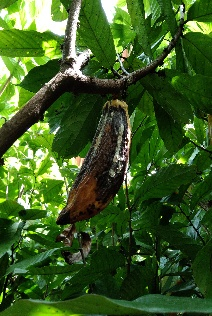

In [6]:
"""comprobar copia de imagen clase 1"""
PIL.Image.open(str(list(img_dir_da.glob(f'../EnfermedadesCacao_BDA/Monilia/*'))[1]))

In [4]:
"""crear diccionario para el acceso de imagenes"""
cacao_images_dict = {
    'monilia': list(img_dir_da.glob('Monilia/*')),
    'sana': list(img_dir_da.glob('Sana/*'))
}

"""crear diccionario de etiquetas"""
cacao_etiquetas = {
    'monilia': 0,
    'sana':1
}

"""mostrar directorio a partir del diccionario"""
print(str(cacao_images_dict['monilia'][0]))

..\EnfermedadesCacao_BDA\Monilia\Monilia1.jpg


### Analizar dimension de las imagenes

In [8]:
"""funcion para observar la dimension de las imagenes"""
def verificarDimensionImg(_cacaoimgdict):
    """acceder al conjunto de imagenes"""
    for clase,imgs_cacao in _cacaoimgdict.items():
        """mostrar clase de cacao"""
        print('Clase:',clase)
        """acceder a cada img"""
        for imagen in range(len(imgs_cacao)):
            """mostrar clase de cacao, nombre imagen, dimension (y, x, RGB)"""
            print(f"{str(cacao_images_dict[clase][imagen])}:{cv2.imread(str(cacao_images_dict[clase][imagen])).shape}")

In [ ]:
"""comprobando dimension del conjunto de imagenes"""
verificarDimensionImg(cacao_images_dict)

In [9]:
"""funcion para cambiar dimension de imagenes"""
def cambiarDimensionImg(_cacaoimgdict, ancho=0, alto=0):
    """seleccionar clase e imagenes a partir del diccionario de imgs""" 
    for clase, imgs_cacao in cacao_images_dict.items():
        """mostrar clase cacao"""
        print('Clase:',clase)
        """recorrer el conjunto de imagenes"""
        for imagen in range(len(imgs_cacao)):
            """obtener dimension actual de img con todos los canales x y rgb"""
            dimen_img = cv2.imread(str(cacao_images_dict[clase][imagen]),cv2.IMREAD_UNCHANGED)
            """cambiar dimension de img"""
            imagen_redim = cv2.resize(dimen_img,(ancho,alto))
            """sobreescribir img"""
            cv2.imwrite(str(cacao_images_dict[clase][imagen]),imagen_redim)
            print(imagen)

In [ ]:
"""cambiando dimension de las imagenes"""
cambiarDimensionImg(cacao_images_dict, 212, 316)

## Aumentar datos (imagenes)

In [62]:
"""instanciar clase generador de datos de imagenes a detalle por
rango de rotacion, rango de cambio de ancho y por altura, reescalado,
rango de corte, aproximacion y volteado de imagen""
"""
generador_imagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        #vertical_flip=True,
        #channel_shift_range=5,
        fill_mode='nearest'
        )

In [3]:
"""clase para aumentar imagenes"""
class AumentarImagen(object):

    """metodo para crear imagen"""
    def crearImagen(self, _generador_imagen, _ruta, _cantidad=0):
        """asignar directorio"""
        os.chdir(_ruta)
        j=1
        """acceder a imagenes de directorio"""
        for dirimg in os.listdir():
            """seleccionar imagen"""
            img = load_img(f"{dirimg}")
            """obtener imagen en array original"""
            x = img_to_array(img)
            """reformar imagen"""
            x = x.reshape((1,) + x.shape)
            """contador para crear imagen"""
            i = 0
            """generar nueva imagen con objeto encapsulado"""
            for bt in _generador_imagen.flow(x, 
                                            batch_size=1,
                                            save_to_dir=".",
                                            save_prefix= dirimg[:-4]+'_da', 
                                            save_format='jpg'):
                i += 1
                """crear n imagenes de 1 img.jpg"""
                if i == _cantidad:     
                    break
            print(f"{j} : {dirimg}")
            j+=1
    """metodo para eliminar fondo de imagen"""
    def eliminarFondo(self, ruta_img_fondo):
        imagenes_actuales = os.listdir(ruta_img_fondo)
        print(imagenes_actuales)
        """asignar imagenes a nuevo directorio"""
        j=1
        for imagen in imagenes_actuales:
            d_img = cv2.imread(imagen)
            remover_fondo= remove(d_img)
            cv2.imwrite(os.path.join(ruta_img_fondo, imagen+"sf"+str(j)+'.png'),remover_fondo)
            print(f"{j} : {imagen} ")
            j+=1

In [79]:
"""indicar rutas de imagenes en el S.O para aumentar datos"""
#ruta=(r"/home/macc/Documents/ProyectoMoniliaCacao/EnfermedadesCacao_DA/Monilia/")
ruta="/ProyectoMoniliaCacao/EnfermedadesCacao_BDA/monilia60"

"""crear objeto para aumentar imagenes"""
aumentar_imagen = AumentarImagen()
"""crear imagenes"""
aumentar_imagen.crearImagen(generador_imagen,ruta, 10)

1 : Monilia60.jpg


# Eliminar Fondo

In [78]:
"""eliminar fondo de imagenes"""
aumentar_imagen.eliminarFondo(ruta)

['Monilia59_da_0_8820.jpgsf5.png', 'Monilia59_da_0_8820.jpgsf5_da_0_1729.jpg', 'Monilia59_da_0_8820.jpgsf5_da_0_4290.jpg']
1 : Monilia59_da_0_8820.jpgsf5.png 
2 : Monilia59_da_0_8820.jpgsf5_da_0_1729.jpg 
3 : Monilia59_da_0_8820.jpgsf5_da_0_4290.jpg 


# Eliminar Ruido

In [7]:
"""seleccionar clase e imagenes a partir del diccionario de imgs""" 
for clase, imgs_cacao in cacao_images_dict.items():
    """mostrar clase cacao"""
    print('Clase:',clase)
    i = 1
    """recorrer el conjunto de imagenes"""
    for imagen in range(len(imgs_cacao)):
        """obtener img"""
        d_img = cv2.imread(str(cacao_images_dict[clase][imagen]))
        """quitar ruido de imagen"""
        dst = cv2.fastNlMeansDenoisingColored(d_img,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])        
        """guardar imagen"""
        cv2.imwrite(str(cacao_images_dict[clase][imagen]),cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        print(i,imagen)
        i+=1

Clase: monilia
1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 10
12 11
13 12
14 13
15 14
16 15
17 16
18 17
19 18
20 19
21 20
22 21
23 22
24 23
25 24
26 25
27 26
28 27
29 28
30 29
31 30
32 31
33 32
34 33
35 34
36 35
37 36
38 37
39 38
40 39
41 40
42 41
43 42
44 43
45 44
46 45
47 46
48 47
49 48
50 49
51 50
52 51
53 52
54 53
55 54
56 55
57 56
58 57
59 58
60 59
61 60
62 61
63 62
64 63
65 64
66 65
67 66
68 67
69 68
70 69
71 70
72 71
73 72
74 73
75 74
76 75
77 76
78 77
79 78
80 79
81 80
82 81
83 82
84 83
85 84
86 85
87 86
88 87
89 88
90 89
91 90
92 91
93 92
94 93
95 94
96 95
97 96
98 97
99 98
100 99
101 100
102 101
103 102
104 103
105 104
106 105
107 106
108 107
109 108
110 109
111 110
112 111
113 112
114 113
115 114
116 115
117 116
118 117
119 118
120 119
121 120
122 121
123 122
124 123
125 124
126 125
127 126
128 127
129 128
130 129
131 130
132 131
133 132
134 133
135 134
136 135
137 136
138 137
139 138
140 139
141 140
142 141
143 142
144 143
145 144
146 145
147 146
148 147
149 148
150 149
151

In [5]:
"""total de imagenes"""
comprobarImagenes(clases_img,img_dir_da)

[PosixPath('../EnfermedadesCacao_DA/Sana/Sana_0_7083.jpg'), PosixPath('../EnfermedadesCacao_DA/Sana/Sana_0_6881.jpg'), PosixPath('../EnfermedadesCacao_DA/Sana/Sana_0_5050.jpg'), PosixPath('../EnfermedadesCacao_DA/Sana/Sana53.jpg'), PosixPath('../EnfermedadesCacao_DA/Sana/Sana_0_1548.jpg')]
495
[PosixPath('../EnfermedadesCacao_DA/Monilia/Monilia_0_3163.jpg'), PosixPath('../EnfermedadesCacao_DA/Monilia/Monilia_0_8240.jpg'), PosixPath('../EnfermedadesCacao_DA/Monilia/Monilia_0_5052.jpg'), PosixPath('../EnfermedadesCacao_DA/Monilia/Monilia_0_9979.jpg'), PosixPath('../EnfermedadesCacao_DA/Monilia/Monilia_0_8450.jpg')]
711
Total imagenes: 1206


In [57]:
from pathlib import Path
for i in range(106,171):
    carpeta = 'monilia'+str(i)
    path = Path('/ProyectoMoniliaCacao/EnfermedadesCacao_BDA/'+carpeta)
    path.mkdir(parents=True)